<a href="https://colab.research.google.com/github/seunghee0518/python_colab/blob/main/sklearn_SVM_%5Bdata_iris%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#version.1 [kernel : leaner / RBF]

In [ ]:
#사용할 패키지 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline

In [ ]:
#iris 데이터 로드하기
iris = datasets.load_iris()
print(iris.keys())
print(iris.data.shape)
print(iris.feature_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
#iris 데이터 정보 보기
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
#데이터 학습시키기 
#전체 데이터 중 data에 해당하는 값중 2개의 열에 전체행값을 x변수에 저장함
x = iris.data[:, :2]
#iris변수에 전체 데이터 중 target에 해당하는 값을 저장한 변수
y = iris.target
#SVM모델 만들기
SVM = svm.SVC(kernel='linear', C=1).fit(x,y)

In [ ]:
#데이터 시각화 전처리
#plot의 처음과 끝값을 지정해주기 위한 변수
x_min, x_max = x[:,0].min()-1, x[:,0].max()+1
y_min, y_max = x[:,1].min()-1, x[:,1].max()+1
#축의 단위를 설정해주는 변수
plot_unit = 0.025
# xx : x가 y의 차원 크기의 행의 개수 만큼 반복된 값을 가지고 있는 변수
#xx는 0.025씩 가로로 증가함
# yy : y가 x의 차원 크기의 열의 개수 만큼 반복된 값을 가지고 있는 변수
# yy는 0.025씩 세로로 증가함
#plot_unit(0.025)만큼 늘어남
#np.meshgrid = 배열 만드는 함수
xx,yy = np.meshgrid(np.arange(x_min, x_max, plot_unit),
                    np.arange(y_min, y_max, plot_unit))

In [ ]:
print(xx)

[[3.3   3.325 3.35  ... 8.825 8.85  8.875]
 [3.3   3.325 3.35  ... 8.825 8.85  8.875]
 [3.3   3.325 3.35  ... 8.825 8.85  8.875]
 ...
 [3.3   3.325 3.35  ... 8.825 8.85  8.875]
 [3.3   3.325 3.35  ... 8.825 8.85  8.875]
 [3.3   3.325 3.35  ... 8.825 8.85  8.875]]


In [ ]:
print(yy)

[[1.    1.    1.    ... 1.    1.    1.   ]
 [1.025 1.025 1.025 ... 1.025 1.025 1.025]
 [1.05  1.05  1.05  ... 1.05  1.05  1.05 ]
 ...
 [5.325 5.325 5.325 ... 5.325 5.325 5.325]
 [5.35  5.35  5.35  ... 5.35  5.35  5.35 ]
 [5.375 5.375 5.375 ... 5.375 5.375 5.375]]


In [ ]:
#ravel함수 : 두개의 배열을 합쳐서 하나의 배열로 만드는 기능
print(xx.ravel())
print(yy.ravel())

[3.3   3.325 3.35  ... 8.825 8.85  8.875]
[1.    1.    1.    ... 5.375 5.375 5.375]


In [ ]:
#numpy.c_[ , ] : 두개의 배열 쌍을 합쳐서 하나의 배열을 구성
print(np.c_[xx.ravel(), yy.ravel()])

[[3.3   1.   ]
 [3.325 1.   ]
 [3.35  1.   ]
 ...
 [8.825 5.375]
 [8.85  5.375]
 [8.875 5.375]]


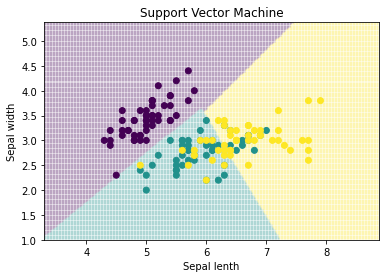

정확도 :  0.82


In [ ]:
#데이터 시각화 및 성능 측정
#ravel함수 : 두개의 배열을 합쳐서 하나의 배열로 만드는 기능
#xx, yy변수에 저장된 행렬의 1행부터 순차적으로 값을 불러와서 1차원 배열을 만듦
#이 배열을 열에 추가한 뒤 학습된 SVM모델에 데이터를 입력해 입력된 데이터가 어떤 class값인지 분류한 값을 z라고 하는 변수에 저장함
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
#plot생성시 같은 차원의 데이터를 사용해주어야 되기 때문에
#이 z변수의 차원을 xx변수의 차원과 같은 차원으로 재형성한 다음에 다시 z변수에 저장함
z = z.reshape(xx.shape)
#입력받은 3개의 수 xx, yy, z의 데이터를 그래프로 표현함
# =>xx, yy좌표에 해당하는 z값에 따라 색상을 다르게 적용함
#alpha = 투명도
plt.pcolormesh(xx,yy,z,alpha=0.1)
#x변수 첫번째 컬럼에 저장된 데이터를 x축, 두번째 컬럼을 y축으로 하여 산점도 그림
plt.scatter(x[:,0], x[:,1], c=y)
#x축의 이름을 설정해줌
plt.xlabel('Sepal lenth')
#y축의 이름을 설정해줌
plt.ylabel('Sepal width')
#x축의 범위
plt.xlim(xx.min(), xx.max())
#plot의 저장을 설정함
plt.title('Support Vector Machine')
plt.show()
#학습된 SVM모델을 통해서 입력되니 데이터를 분류한 다음 실제값과 비교해 분류 정확도를 출력함
print('정확도 : ', SVM.score(X = x, y = y))

##데이터 파라미터 조정 및 성능 측정

##kernel= rbf

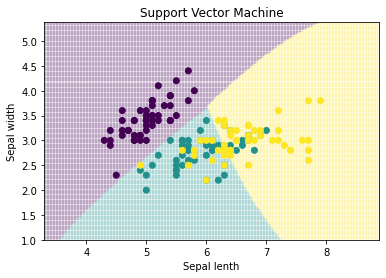

정확도 :  0.82
kernel=rbf로 교체해 비선형으로 분류된 것을 알 수 있음


In [ ]:
x = iris.data[:, :2]
y = iris.target
SVM = svm.SVC(kernel='rbf', C=1).fit(x,y)
x_min, x_max = x[:,0].min()-1, x[:,0].max()+1
y_min, y_max = x[:,1].min()-1, x[:,1].max()+1
plot_unit = 0.025
xx,yy = np.meshgrid(np.arange(x_min, x_max, plot_unit),
                    np.arange(y_min, y_max, plot_unit))
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,alpha=0.1)
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel('Sepal lenth')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ', SVM.score(X = x, y = y))
print('kernel=rbf로 교체해 비선형으로 분류된 것을 알 수 있음')

In [ ]:
#gamma=10
#값을 낮우면 멀리 떨어진 서포트 벡터들의 영향이 낮아지고, 같이 높이면 멀리 떨어진 벡터들의 값이 영향을 크게 하는 역할을 하는 파라미터가 됨
#gamma=10 : 마진이 작아진것을 알 수 있음
#gamma=100 : 마진이 더 작아지고 over-fitting 문제 발생됨
#over-fitting : 새로운 값을 분류할때 살짝만 벗어나도 오분류로 분류하는 문제가 발생함

## kernel=rbf, gamma=10, 100

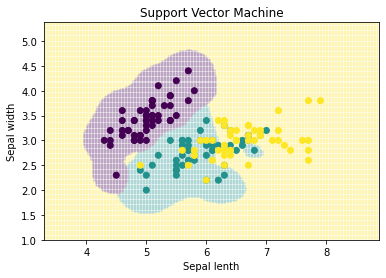

정확도 :  0.84
kernel=rbf로 교체해 비선형으로 분류된 것을 알 수 있음


In [ ]:
x = iris.data[:, :2]
y = iris.target
SVM = svm.SVC(kernel='rbf', C=1, gamma=10).fit(x,y)
x_min, x_max = x[:,0].min()-1, x[:,0].max()+1
y_min, y_max = x[:,1].min()-1, x[:,1].max()+1
plot_unit = 0.025
xx,yy = np.meshgrid(np.arange(x_min, x_max, plot_unit),
                    np.arange(y_min, y_max, plot_unit))
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,alpha=0.1)
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel('Sepal lenth')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ', SVM.score(X = x, y = y))
print('kernel=rbf로 교체해 비선형으로 분류된 것을 알 수 있음')

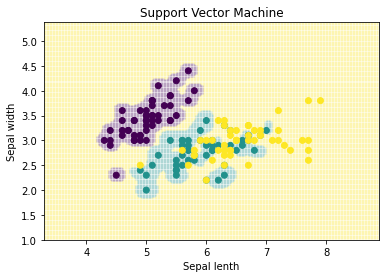

정확도 :  0.92
kernel=rbf로 교체해 비선형으로 분류된 것을 알 수 있음


In [ ]:
x = iris.data[:, :2]
y = iris.target
SVM = svm.SVC(kernel='rbf', C=1, gamma=100).fit(x,y)
x_min, x_max = x[:,0].min()-1, x[:,0].max()+1
y_min, y_max = x[:,1].min()-1, x[:,1].max()+1
plot_unit = 0.025
xx,yy = np.meshgrid(np.arange(x_min, x_max, plot_unit),
                    np.arange(y_min, y_max, plot_unit))
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,alpha=0.1)
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel('Sepal lenth')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ', SVM.score(X = x, y = y))
print('kernel=rbf로 교체해 비선형으로 분류된 것을 알 수 있음')

##kernel=rbf, gamma=auto, c=100


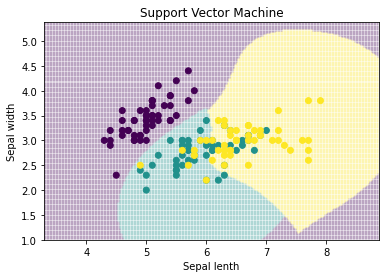

정확도 :  0.82
kernel=rbf로 교체해 비선형으로 분류된 것을 알 수 있음


In [ ]:
x = iris.data[:, :2]
y = iris.target
SVM = svm.SVC(kernel='rbf', C=100, gamma = 'auto').fit(x,y)
x_min, x_max = x[:,0].min()-1, x[:,0].max()+1
y_min, y_max = x[:,1].min()-1, x[:,1].max()+1
plot_unit = 0.025
xx,yy = np.meshgrid(np.arange(x_min, x_max, plot_unit),
                    np.arange(y_min, y_max, plot_unit))
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,alpha=0.1)
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel('Sepal lenth')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ', SVM.score(X = x, y = y))
print('kernel=rbf로 교체해 비선형으로 분류된 것을 알 수 있음')

In [ ]:
#c 파라미터를 높이면 성능을 높일 수 있으나
#과도하게 높이면 과최적화 문제가 발생함

#version.2 [kernel : linear]

TF_CPP_MIN_LOG_LEVEL : 환경 변수를 사용하여 로깅 제어
* 기본값은 0, 모든 로그가 표시됨
* INFO로그를 필터링 : 1
* WARNING로그를 필터링 : 2
* ERROR로그로 필터링 : 3

In [7]:
#library
from sklearn import svm, metrics, datasets, model_selection
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [8]:
#iris data & train/test data
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size = 0.6, random_state = 42)

In [9]:
#Training SVM model & prediction - linear classification
svm = svm.SVC(kernel = 'linear', C =1.0, gamma = 0.5) 
svm.fit(X_train, y_train) #Model training as train data

predictions = svm.predict(X_test) #prediction as test data

In [10]:
#accracy
score = metrics.accuracy_score(y_test, predictions)
print('accracy : {0:f}'.format(score) )

accracy : 0.988889
